In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
from sklearn.model_selection import train_test_split
X = df['Message']
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [7]:
len(X_train_vectorized.toarray()[0])    

7718

In [8]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)
model.score(X_test_vectorized, y_test)

0.9820627802690582

In [9]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
emails = [
    "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize.",
    "Hey, I hope you're doing well. Just wanted to check in and see how things are going.",
]

model.predict(vectorizer.transform(emails))

array([1, 0])

## Using Pipeline

In [11]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])
pipeline.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(pipeline, X_train, y_train, cv=10).mean()

np.float64(0.9858643623721468)

In [18]:
res = pipeline.predict_proba(
    ["Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize."]
)

In [23]:
res


array([[2.00995136e-08, 9.99999980e-01]])

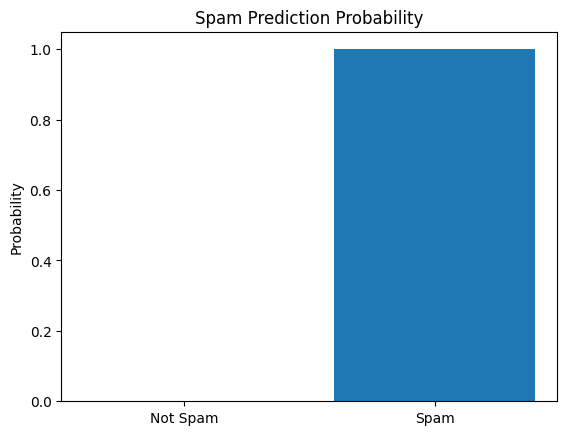

In [ ]:
email = [
    "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize."
]
probs = pipeline.predict_proba(email)[0]
plt.bar(['Not Spam', 'Spam'], probs)
plt.ylabel('Probability')
plt.title('Spam Prediction Probability')
plt.show()